<a href="https://colab.research.google.com/github/LatiefDataVisionary/multivariate-analysis-college-task/blob/main/src/KMeans_w11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

**1. Load Dataset (kolom BloodPressure dan Age serta 100 baris pertama)**

In [2]:
path = kagglehub.dataset_download('whenamancodes/predict-diabities')
print(f"Konten/dataset dari downloaded directory '{path}':")
for item in os.listdir(path):
    print(item)

csv_file_path = os.path.join(path, 'diabetes.csv')

100%|██████████| 8.91k/8.91k [00:00<00:00, 12.1MB/s]

Extracting files...
Konten/dataset dari downloaded directory '/root/.cache/kagglehub/datasets/whenamancodes/predict-diabities/versions/1':
diabetes.csv


In [3]:
df = pd.read_csv(csv_file_path, usecols=['BloodPressure', 'Age'], nrows=100)
df.head()

,BloodPressure,Age
0,72,50
1,66,31
2,64,32
3,66,21
4,40,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  100 non-null    int64
 1   Age            100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [5]:
df.describe()

,BloodPressure,Age
count,100.000000,100.000000
mean,68.070000,34.420000
std,22.009298,11.212529
min,0.000000,21.000000
25%,64.000000,25.750000
50%,72.000000,31.000000
75%,80.000000,42.000000
max,110.000000,60.000000


**2. Data Preprocessing**

Cek missing Values

In [6]:
df.isnull().sum()

,0
BloodPressure,0
Age,0


In [7]:
# Mengganti nilai 0 di BloodPressure dengan NaN
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)

In [8]:
# Cek missing values setelah penggantian
print("Missing values setelah mengganti 0 dengan NaN:")
print(df.isnull().sum())

Missing values setelah mengganti 0 dengan NaN:
BloodPressure    6
Age              0
dtype: int64


In [9]:
# Imputasi missing values (menggunakan median agar tidak terlalu terpengaruh outlier jika ada)
imputer = SimpleImputer(strategy='median')
df[['BloodPressure']] = imputer.fit_transform(df[['BloodPressure']])

In [10]:
# Cek kembali info dan describe setelah imputasi
print("\nInfo setelah imputasi:")
df.info()
print("\nDescribe setelah imputasi:")
print(df.describe())


Info setelah imputasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BloodPressure  100 non-null    float64
 1   Age            100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB

Describe setelah imputasi:
       BloodPressure         Age
count     100.000000  100.000000
mean       72.390000   34.420000
std        13.626248   11.212529
min        30.000000   21.000000
25%        66.000000   25.750000
50%        72.000000   31.000000
75%        80.000000   42.000000
max       110.000000   60.000000


Standarisasi data

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['BloodPressure', 'Age']])

**3. Menentukan dan Melihat Jumlah Klaster Optimal (Elbow Metthod) secara otomatis**

  - Menghitung SSE (Sum of Squared Errors) untuk k=1 hingga 10
  - Mendeteksi titik siku secara otomatis

In [12]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

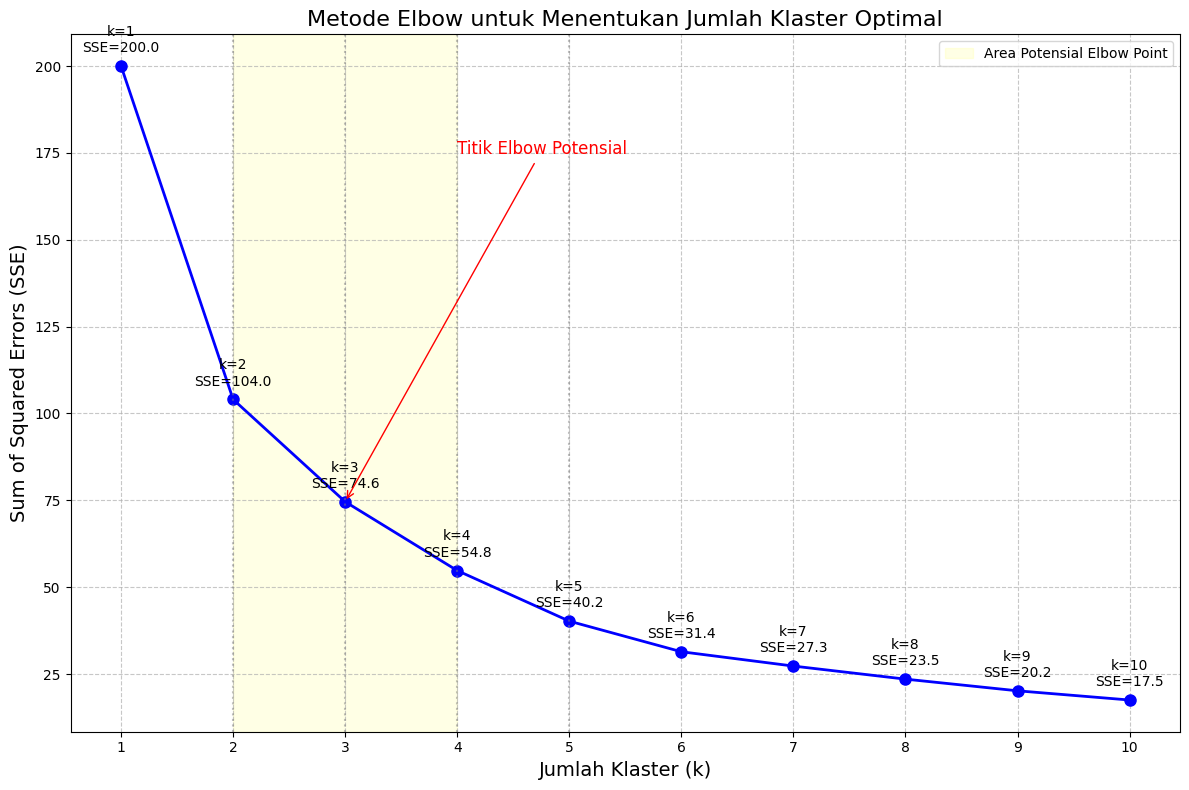

In [13]:
# Visualisasi Elbow Method yang lebih informatif
plt.figure(figsize=(12, 8))

k_range = range(1, 11) # Define k_range

# Plot SSE vs k
plt.plot(k_range, sse, 'bo-', linewidth=2, markersize=8)
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal', fontsize=16)
plt.xlabel('Jumlah Klaster (k)', fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Tambahkan garis penanda dan anotasi
for k in k_range:
    plt.annotate(f"k={k}\nSSE={sse[k-1]:.1f}",
                 (k, sse[k-1]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=10)

# Garis penanda khusus untuk titik-titik kunci
plt.axvline(x=2, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=3, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=4, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=5, color='gray', linestyle=':', alpha=0.5)

# Highlight area elbow point
plt.axvspan(2, 4, color='yellow', alpha=0.1, label='Area Potensial Elbow Point')

# Tambahkan panah untuk menunjukkan lokasi elbow
plt.annotate('Titik Elbow Potensial',
             xy=(3, sse[2]),
             xytext=(4, sse[2] + 100),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.savefig('elbow_method_detailed.png', dpi=300)
plt.show()

In [14]:
k_optimal = int(input("\nMasukkan jumlah klaster (k) yang Anda pilih: "))


Masukkan jumlah klaster (k) yang Anda pilih: 3


**4. K-Means clustering**

  - Membuat model dengan k optimal
  - Menambahkan label klaster ke dataset

In [15]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

**5. Menghitung statistik per klaster**

- Jumlah pasien, rata-rata usia, rata-rata tekanan darah

In [16]:
cluster_stats = df.groupby('Cluster').agg(
    Patients=('Age', 'count'),
    Avg_Age=('Age', 'mean'),
    Avg_BP=('BloodPressure', 'mean'),
    BP_Std=('BloodPressure', 'std')
).reset_index()

**6. Visualize results**


  - Scatter plot dengan warna berbeda per klaster
  - Menampilkan posisi centroid
  - Garis referensi tekanan darah

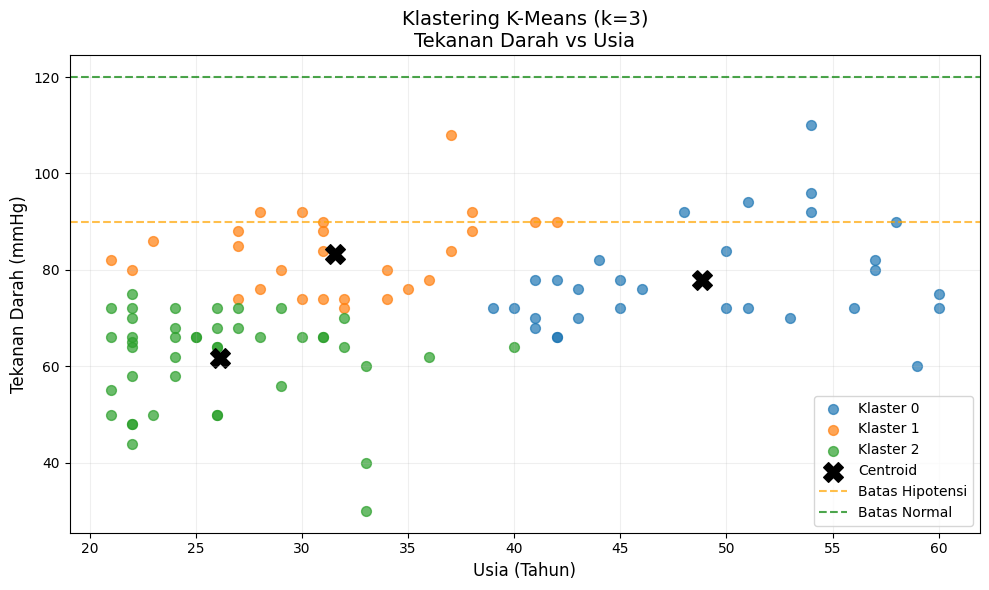

In [17]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(k_optimal):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['BloodPressure'],
                color=colors[i], alpha=0.7, s=50, label=f'Klaster {i}')

# Plot centroid
plt.scatter(centroids[:, 1], centroids[:, 0], marker='X', s=200,
            color='black', label='Centroid')

# Garis referensi medis
plt.axhline(90, color='orange', linestyle='--', alpha=0.7, label='Batas Hipotensi')
plt.axhline(120, color='green', linestyle='--', alpha=0.7, label='Batas Normal')

# Format visualisasi
plt.title(f'Klastering K-Means (k={k_optimal})\nTekanan Darah vs Usia', fontsize=14)
plt.xlabel('Usia (Tahun)', fontsize=12)
plt.ylabel('Tekanan Darah (mmHg)', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('hasil_klastering.png', dpi=300)

**7. Laporan Hasil**


In [18]:
print("="*50)
print(f"{'ANALISIS KLASTERING K-MEANS (200 baris pertama)':^50}")
print("="*50)
print(f"{'Jumlah klaster optimal:':<25} {k_optimal}")
print(f"{'Total pasien:':<25} {len(df)}")
print(f"{'Skor Silhouette:':<25} {silhouette_score(scaled_data, df['Cluster']):.3f}")
print("\n" + "-"*50)
print(f"{'STATISTIK PER KLASTER':^50}")
print("-"*50)
print(cluster_stats.round(1).to_string(index=False))
print("\n" + "-"*50)
print(f"{'INTERPRETASI MEDIS':^50}")
print("-"*50)

# Interpretasi hasil berdasarkan standar medis
for i in range(k_optimal):
    stats = cluster_stats[cluster_stats['Cluster'] == i].iloc[0]

    # Kategorisasi tekanan darah
    if stats['Avg_BP'] < 90:
        status_td = "Hipotensi"
    elif stats['Avg_BP'] < 120:
        status_td = "Normal"
    elif stats['Avg_BP'] < 130:
        status_td = "Pra-hipertensi"
    else:
        status_td = "Hipertensi"

    # Kategorisasi kelompok usia
    if stats['Avg_Age'] < 30:
        kelompok_usia = "Muda"
    elif stats['Avg_Age'] < 50:
        kelompok_usia = "Dewasa"
    else:
        kelompok_usia = "Lanjut Usia"

    print(f"Klaster {i} ({int(stats['Patients'])} pasien):")
    print(f"  - Profil khas: Pasien {kelompok_usia} dengan {status_td}")
    print(f"  - Rerata Usia: {stats['Avg_Age']:.1f} tahun | Rerata Tekanan darah: {stats['Avg_BP']:.1f} mmHg")

 ANALISIS KLASTERING K-MEANS (200 baris pertama)  
Jumlah klaster optimal:   3
Total pasien:             100
Skor Silhouette:          0.368

--------------------------------------------------
              STATISTIK PER KLASTER               
--------------------------------------------------
 Cluster  Patients  Avg_Age  Avg_BP  BP_Std
       0        30     48.9    77.9    10.8
       1        27     31.6    83.4     8.3
       2        43     26.1    61.7     9.9

--------------------------------------------------
                INTERPRETASI MEDIS                
--------------------------------------------------
Klaster 0 (30 pasien):
  - Profil khas: Pasien Dewasa dengan Hipotensi
  - Rerata Usia: 48.9 tahun | Rerata Tekanan darah: 77.9 mmHg
Klaster 1 (27 pasien):
  - Profil khas: Pasien Dewasa dengan Hipotensi
  - Rerata Usia: 31.6 tahun | Rerata Tekanan darah: 83.4 mmHg
Klaster 2 (43 pasien):
  - Profil khas: Pasien Muda dengan Hipotensi
  - Rerata Usia: 26.1 tahun | Rerata Tek

**8. Menyimpan hasil**

In [19]:
df.to_excel("hasil_klastering.xlsx", index=False)
print("\n" + "="*50)
print(f"Hasil disimpan ke hasil_klastering.xlsx")
print(f"Visualisasi disimpan ke hasil_klastering.png")


Hasil disimpan ke hasil_klastering.xlsx
Visualisasi disimpan ke hasil_klastering.png
